<a href="https://colab.research.google.com/github/monirulhasan1996/SpamEmailClassification/blob/main/SpamEmailClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing Dataset**

[Dataset](https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset/code?fbclid=IwAR0qFOS7CpBJWVMi2PNF4b_4Vlqiz4Jwdtc8muVAnuyMuK6hiUIlgjRWMFk)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/monirulhasan1996/SpamEmailClassification/main/dataset.csv')

In [ ]:
print(df)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


**Analysis of dataset**

In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
ham_df = df[df['spam'] == 0]
spam_df = df[df['spam'] == 1]

In [ ]:
ham_df

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [ ]:
print('Spam Percentage =',(len(spam_df)/len(df))*100,'%')
print('Ham Percentage =',(len(ham_df)/len(df))*100,'%')

Spam Percentage = 23.88268156424581 %
Ham Percentage = 76.11731843575419 %


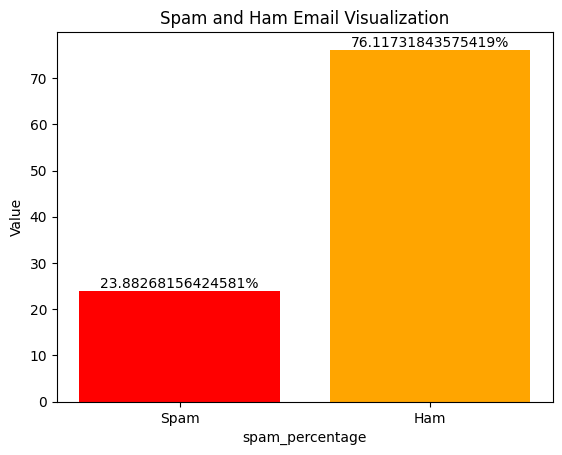

In [ ]:
# Data
spam_percentage = len(spam_df)/len(df)*100
ham_percentage = len(ham_df)/len(df)*100

# Labels for the bars
labels = ['Spam', 'Ham']

# Heights of the bars
heights = [spam_percentage, ham_percentage]

# Bar colors
colors = ['red', 'orange']

# Creating the bar chart
plt.bar(labels, heights, color=colors)

# Adding labels and title
plt.xlabel('spam_percentage')
plt.ylabel('Value')
plt.title('Spam and Ham Email Visualization')

# Displaying the percentage labels on top of each bar
for i in range(len(heights)):
    plt.text(i, heights[i], f'{heights[i]}%', ha='center', va='bottom')

# Displaying the chart
plt.show()


**Counting Spam and Ham Email in the Dataset**

In [ ]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

**Dropping duplicates**

In [ ]:
df.drop_duplicates(inplace = True)

**Checking Missing Data**

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

**Separating Spam and Not Spam**

In [ ]:
x = df.text.values
y = df.spam.values

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

**Data Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**ML Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train, ytrain)

MultinomialNB()

In [ ]:
x_test = cv.transform(xtest)

In [ ]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model.score(x_test, ytest)

0.9894644424934153

In [ ]:
emails = ["hey, i'm looking for machine learning tutorial in bengali language", "Hey you win an iphone x giveway for free please send me your address to the survey"]

In [ ]:
cv_emails = cv.transform(emails)

In [ ]:
result = model.predict(cv_emails)
result

array([0, 1])

**Printing the result**

In [ ]:
index = 0
for i in result:
  email = emails[index];
  status = "Spam" if (i == 1) else "Ham(Not Spam)"
  print("Classified as->", status, "\n Email:", email)
  index += 1

Classified as-> Ham(Not Spam) 
 Email: hey, i'm looking for machine learning tutorial in bengali language
Classified as-> Spam 
 Email: Hey you win an iphone x giveway for free please send me your address to the survey


**Confusion Matrix Visualization**

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have obtained the model predictions as 'y_pred'
y_pred = model.predict(x_test)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(ytest, y_pred)
print(confusion_mtx)


[[853   6]
 [  6 274]]


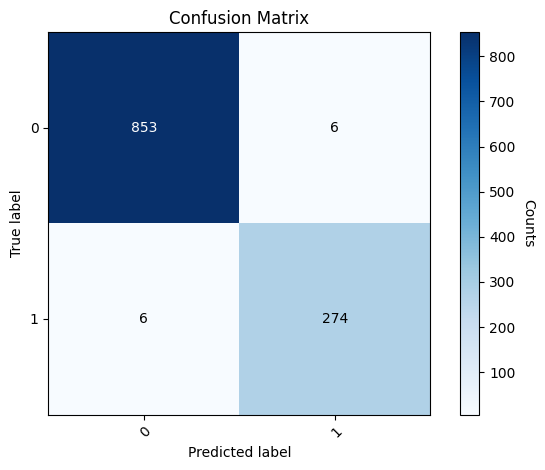

In [ ]:
# Assuming you have obtained the model predictions as 'y_pred'
y_pred = model.predict(x_test)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(ytest, y_pred)

# Get the unique class labels
classes = np.unique(np.concatenate((ytest, y_pred)))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
im = ax.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)

# Customize the plot
ax.set(xticks=np.arange(confusion_mtx.shape[1]),
       yticks=np.arange(confusion_mtx.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Display the colorbar
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Loop over the data and annotate the counts
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        ax.text(j, i, format(confusion_mtx[i, j], 'd'),
                ha="center", va="center", color="white" if confusion_mtx[i, j] > confusion_mtx.max() / 2 else "black")

# Show the plot
plt.tight_layout()
plt.show()


# -- The End --

